In [136]:
import pandas as pd
import numpy as np
df=pd.read_csv("singapore.csv")
df.columns=["Year",'Type','Age_Group','Count']

In [142]:
print(df.head(5))


   Year             Type      Age_Group   Count
0  1957  Total Residents  0  -  4 Years  264727
1  1957  Total Residents  5  -  9 Years  218097
2  1957  Total Residents  10 - 14 Years  136280
3  1957  Total Residents  15 - 19 Years  135679
4  1957  Total Residents  20 - 24 Years  119266


In [138]:
ethinicity_df=df.loc[(df['Type'] == 'Total Malays') | (df['Type'] == 'Total Chinese')
                     |(df['Type'] == 'Total Indians')|(df['Type'] == 'Other Ethnic Groups')]

In [139]:
ethinicity_df = ethinicity_df[(ethinicity_df.Age_Group != '65 Years & Over')&
            (ethinicity_df.Age_Group != '70 Years & Over')&
            (ethinicity_df.Age_Group != '75 Years & Over')&(ethinicity_df.Age_Group != '80 Years & Over')]
print(ethinicity_df.head(5))


    Year          Type      Age_Group  Count
66  1957  Total Malays  0  -  4 Years  43161
67  1957  Total Malays  5  -  9 Years  29135
68  1957  Total Malays  10 - 14 Years  16614
69  1957  Total Malays  15 - 19 Years  17575
70  1957  Total Malays  20 - 24 Years  20473


In [140]:
total_malays=[]
total_chinese=[]
total_indians=[]
total_others=[]
ethinicity_df.loc[(ethinicity_df['Count']=='na')]=0
ethinicity_df['Count'] = ethinicity_df['Count'].astype(int)
# print(ethinicity_df.head(25))

x=[i for i in range(1957,2019)]
for year in x:
    malays=ethinicity_df.loc[(ethinicity_df['Year'] == year) & (ethinicity_df['Type'] == 'Total Malays'), 'Count'].sum()
    total_malays.append(malays)
    chinese=ethinicity_df.loc[(ethinicity_df['Year'] == year) & (ethinicity_df['Type'] == 'Total Chinese'), 'Count'].sum()
    total_chinese.append(chinese)
    indians=ethinicity_df.loc[(ethinicity_df['Year'] == year) & (ethinicity_df['Type'] == 'Total Indians'), 'Count'].sum()
    total_indians.append(indians)
    others=ethinicity_df.loc[(ethinicity_df['Year'] == year) & (ethinicity_df['Type'] == 'Other Ethnic Groups'), 'Count'].sum()
    total_others.append(others)



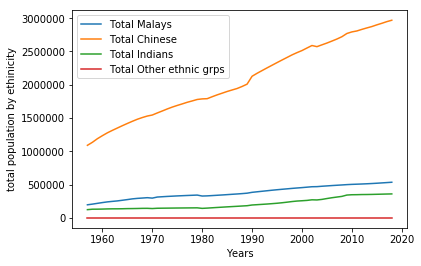

In [141]:
import matplotlib.pyplot as plt
plt.plot(x,total_malays,label='Total Malays')
plt.plot(x,total_chinese,label="Total Chinese")
plt.plot(x,total_indians,label="Total Indians")
plt.plot(x,total_others,label="Total Other ethnic grps")
plt.xlabel('Years')
plt.ylabel('total population by ethinicity')
plt.legend()